In [1]:

import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

Text(0.5, 1.0, 'SVC with linear kernel')

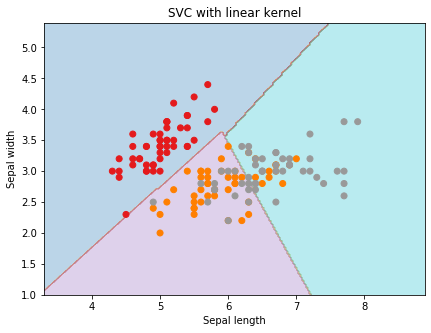

In [6]:
C = 1.0
svc_classifier = svm.SVC(kernel='linear',C=C, decision_function_shape = 'ovr').fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

In [7]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
X = np.array([[2, 4.8], [2.9, 4.7], [2.5, 5], [3.2, 5.5], [6, 5], [7.6, 4],
              [3.2, 0.9], [2.9, 1.9],[2.4, 3.5], [0.5, 3.4], [1, 4], [0.9, 5.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [9]:
Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75)

In [10]:
Classifier_LR.fit(X, y)

LogisticRegression(C=75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

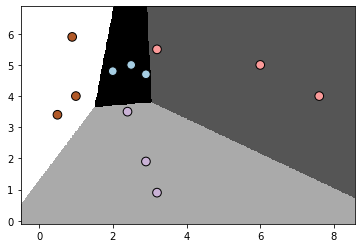

In [27]:

min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
mesh_step_size = 0.02
x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),np.arange(min_y, max_y, mesh_step_size))
output = Classifier_LR.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output = output.reshape(x_vals.shape)
plt.figure()
plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)
 
plt.scatter(X[:, 0], X[:, 1], c = y, s = 75, edgecolors = 'black', 
linewidth=1, cmap = plt.cm.Paired)

In [51]:
import pydotplus
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
import collections
from sklearn.model_selection import train_test_split

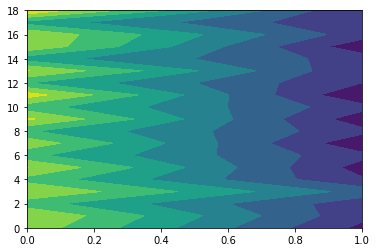

In [100]:
X = [[165,19],[175,32],[136,35],[174,65],[141,28],[176,15],[131,32],
[166,6],[128,32],[179,10],[136,34],[186,2],[126,25],[176,28],[112,38],
[169,9],[171,36],[116,25],[196,25]]

Y = ['Man','Woman','Woman','Man','Woman','Man','Woman','Man','Woman',
'Man','Woman','Man','Woman','Woman','Woman','Man','Woman','Woman','Man']
data_feature_names = ['height','length of hair']
plt.contourf(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=5)

In [56]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [95]:
prediction = clf.predict([[233,37]])
print(prediction)

['Man']


In [87]:
dot_data = tree.export_graphviz(clf,feature_names = data_feature_names,
            out_file = None,filled = True,rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('orange', 'yellow')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges: edges[edge].sort()

for i in range(2):dest = graph.get_node(str(edges[edge][i]))[0]
dest.set_fillcolor(colors[i])


In [205]:
graph.write_png('Decisiontree16.png')

NameError: name 'graph' is not defined

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import matplotlib.pyplot as plt
import numpy as np

In [91]:
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [92]:
forest = RandomForestClassifier(n_estimators = 50, random_state = 0)
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
print('Accuracy on the training subset:(:.3f)',format(forest.score(X_train,y_train)))
print('Accuracy on the training subset:(:.3f)',format(forest.score(X_test,y_test)))

Accuracy on the training subset:(:.3f) 1.0
Accuracy on the training subset:(:.3f) 0.965034965034965


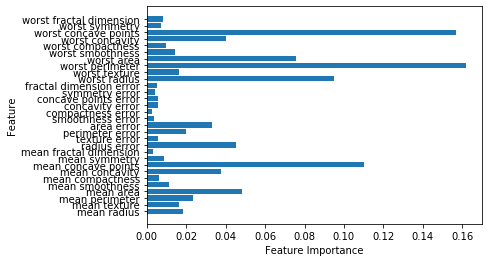

In [94]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [132]:
import numpy as np

math = [84, 82, 81, 89, 73, 94, 92, 70, 88, 95]
science = [85, 82, 72, 77, 75, 89, 95, 84, 77, 94]
data = np.array([math, science])

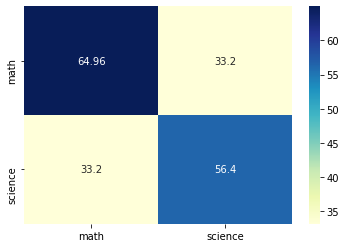

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.decomposition import PCA
cov=np.cov(data, bias=True)

labs = ['math', 'science']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs,cmap='YlGnBu')
plt.show()


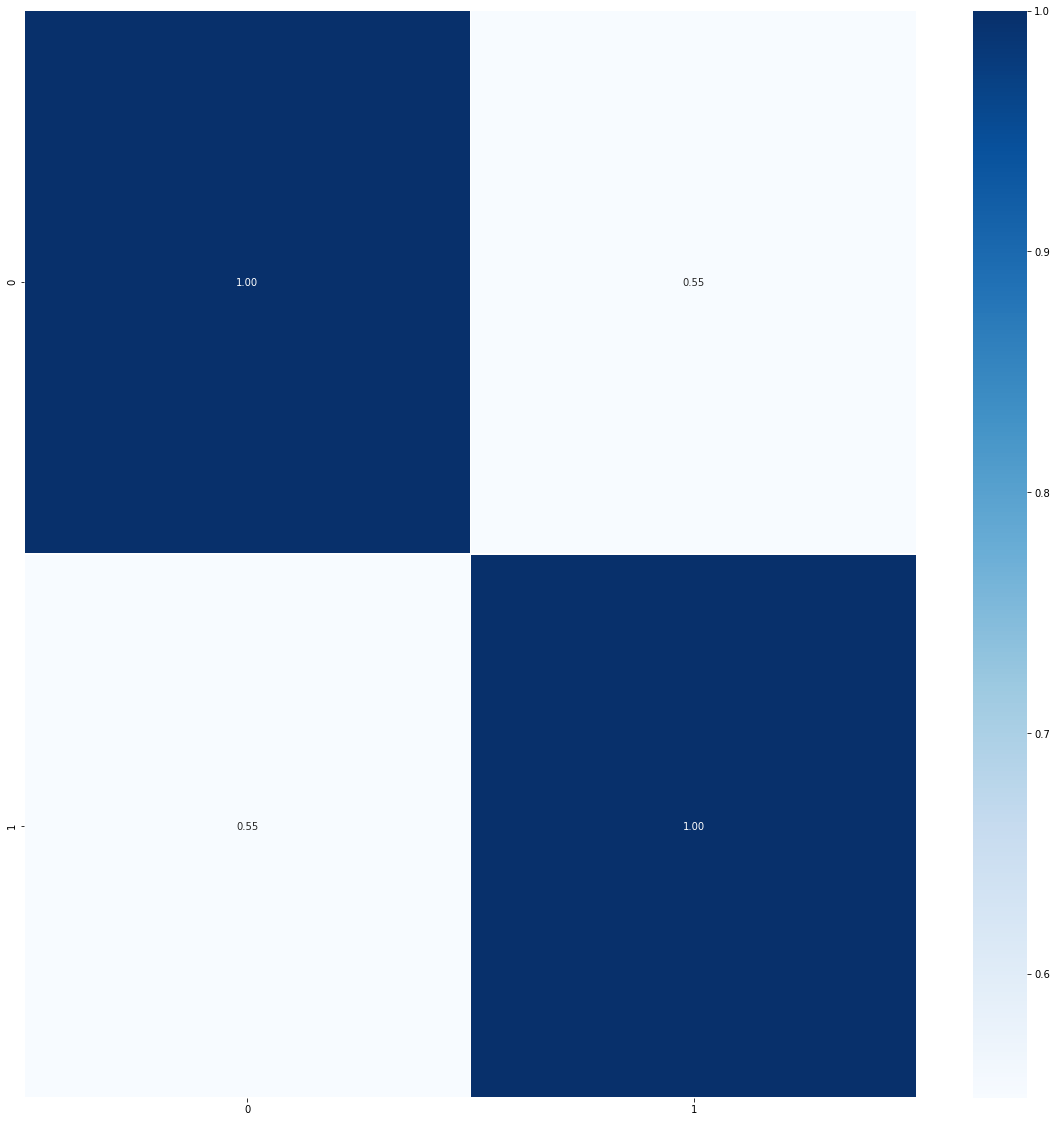

In [133]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
data=sc.fit_transform(np.transpose(data))
# Covariance Matrix
# bias =True, so dataset is normalized
# rowvar = False, each column represents a variable, i.e., a feature. This way we compute the covariance of features as whole instead of the covariance of each row
covariance_df = pd.DataFrame(data=np.cov(data, bias=True, rowvar=False))
# Plot Covariance Matrix
plt.subplots(figsize=(20, 20))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [138]:
import pandas as pd
from statsmodels.multivariate.pca import PCA
pca = PCA(data, standardize=True, method='eig')
loadings = pca.loadings
print(loadings)
results=la.eig(covariance_df)
print(results[0],'eigenvalues')

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0.4515014+0.j 1.5484986+0.j] eigenvalues


In [113]:


results=la.eig(cov)
print(results[0],'eigenvalues')

[94.15474272+0.j 27.20525728+0.j] eigenvalues


In [114]:
print(results[1],'eigenvector')

[[ 0.75095193 -0.66035688]
 [ 0.66035688  0.75095193]] eigenvector


In [115]:
eigvals, eigvecs = la.eig(cov)

In [116]:
eigvals = eigvals.real
print(eigvals)

[94.15474272 27.20525728]


In [118]:
v1 = eigvecs[:,0] # First column is the first eigenvector
print(v1)

[0.75095193 0.66035688]


In [119]:
v2 = eigvecs[:,1] # Second column is the second eigenvector
print(v2)

[-0.66035688  0.75095193]


In [120]:
v1 @ v2

0.0

In [126]:

# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
E,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [127]:
print(E)

[[ 1.22515974 -0.95173116]
 [ 1.01630365 -1.72517506]
 [ 0.33534004 -1.7248955 ]
 ...
 [ 1.54270795 -0.05566478]
 [ 0.81664566 -1.2509187 ]
 [ 1.13782254 -1.26151957]]


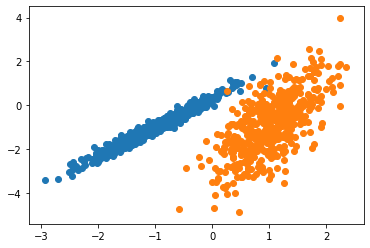

In [128]:
for class_value in range(2):

    row_ix = where(y == class_value)
    
    pyplot.scatter(E[row_ix, 0], E[row_ix, 1])

pyplot.show()



In [164]:
from random import randrange
cent1=randrange(len(X)-1)
cent2=randrange(len(X)-1)
## calculate the manhattan distance fron each centroid in all data set
## create a list where d_1[i] is the distance from the ith data point to centroid 1

##apply same logic for d_2[i] the secondd centorid distance list
def centorid1distance(X,cent1):
    distance1=[]
    i=0
    for i in range(len(X)-1):
        np.array(distance1.append(np.absolute(X[cent1,0]-X[i,0])+np.absolute(X[cent1,1]-X[i,1])))
        
    return (distance1)


centorid1distance(E,cent1)
    

def centorid2distance(X,cent2):
    distance2=[]
    i=0
    for i in range(len(X)-1):
        np.array(distance2.append(np.absolute(X[cent2,0]-X[i,0])+np.absolute(X[cent2,1]-X[i,1])))
        
    return (distance2)


centorid2distance(E,cent2)





## sanity check to see if my distance lists are correct


a=0
midclust1=[]
midclust2=[]
for a in range(len(E)-1):
    if centorid1distance(E,cent1)[a] >centorid2distance(E,cent2)[a]:
        np.array(midclust1.append(E[a,:]))
    if centorid1distance(E,cent1)[a] <centorid2distance(E,cent2)[a]:
        np.array(midclust2.append(E[a,:]))
    #print(midclust1,'stuff')

    
midclust11=np.array(midclust1)
midclust1x=midclust11[:,0]
midclust1y=midclust11[:,1]


midclust22=np.array(midclust2)
midclust2x=midclust22[:,0]
midclust2y=midclust22[:,1]



nextclust1x=np.sum(midclust1x)/len(E)-1
nextclust1y=np.sum(midclust1y)/len(E)-1


nextclust2x=np.sum(midclust2x)/len(E)-1
nextclust2y=np.sum(midclust2y)/len(E)-1

print(nextclust1x,nextclust1y,'x and y ave for first cluster')

print(nextclust2x,nextclust2y,'x and y ave for secon cluster')


j=0
distancenext1=[]
distancenext2=[]
for j in range(len(E)-1):
    np.array(distancenext1.append(np.absolute(nextclust1x-E[j,0])+np.absolute(nextclust1y-E[j,1])))
    np.array(distancenext2.append(np.absolute(nextclust2x-E[j,0])+np.absolute(nextclust2y-E[j,1])))
    
    

    
## Now compare the distance lists if d_1 is greater than the ith data point is closer to d_1
## same for d_2
##then we take mid point of these lists for the next iteration

#def compare(distance1,distance2,X):
   # midclust1=[]
   # midclust2=[]    
   # q=0
    
    
    #for q in range(len(X)-1):
        
       # if distance1[q]>distance2[q]:
       #     
       #     np.array(midclust1.append(X[q,:]))
       # 
       # if distance1[q]<distance2[q]:
       #     return (q)
      #      np.array(midclust2.append(X[q,:]))
        
  #  midclusts=np.array([midclust1,midclust2])
    
  #  return midclusts




#compare(centorid1distance(E,cent1),centorid2distance(E,cent2),E)

   
#def newcluster2(midclusts,X):
   # midclust1=midclusts[:,0:2]
   # midclust2=midclusts[:,2:4]
    #return midclust1
    #midclusts1x=midclust1[:,:]
    #midclusts1y=midclust1[:,:]
    #midclusts2x=midclust2[:,:]
    #midclusts2y=midclust2[:,:]
    #print(midclusts1x)


-1.0017580793210588 -1.6996393816311222 x and y ave for first cluster
-1.000157306403113 -1.2701818722330933 x and y ave for secon cluster


In [166]:
q=0
ohmyclust1=[]
ohmyclust2=[]
for q in range(len(E)-1):
    
    if distancenext1[q]>distancenext2[q]:
        ohmyclust1.append(E[q,:])
    if distancenext1[q]<distancenext2[q]:
        ohmyclust2.append(E[q,:])

ohmyclust1=np.array(ohmyclust1)
ohmyclust2=np.array(ohmyclust2)

ohmyclust1x=ohmyclust1[:,0]
ohmyclust1y=ohmyclust1[:,1] 

ohmyclust2x=ohmyclust2[:,0]
ohmyclust2y=ohmyclust2[:,1] 



nextohmyclust1x=np.sum(ohmyclust1x)/len(E)-1
nextohmyclust1y=np.sum(ohmyclust1y)/len(E)-1
nextohmyclust2x=np.sum(ohmyclust2x)/len(E)-1
nextohmyclust2y=np.sum(ohmyclust2y)/len(E)-1

print(nextohmyclust1x,nextohmyclust1y,'next first cluster')
print(nextohmyclust2x,nextohmyclust2y,'next second cluster')


-0.861663264510678 -1.2898995662053356 next first cluster
-1.140252121213494 -1.6799216876588798 next second cluster


In [171]:
class Kmeansclustertwofeat:
    
    
    def __init__(self,X):
        self.X=X
        
    def distance(self,X,w,y):
        distance=[]
        i=0
        for i in range(len(self.X)-1):
            distance.append(np.absolute(w-self.X[i,0])+np.absolute(y-self.X[i,1]))
        distance =np.array(distance)
        return distance
    
    def compare(self,X,distance1,distance2):
        q=0
        midclust1=[]
        midclust2=[]
        
        
        for q in range(len(self.X)-1):
            if distance1[q]>distance2[q]:
                midclust1.append(self.X[q,:]) 
            if distance1[q]<distance2[q]:
                midclust2.append(self.X[q,:])
        
        midclust1=np.array(midclust1)
        midclust2=np.array(midclust2)
        
        midclust1x=midclust1[:,0]
        midclust1y=midclust1[:,1]
        
        midclust2x=midclust1[:,0]
        midclust2y=midclust1[:,1]
        
        nextcluster1x=np.sum(midclust1x)/len(self.X)-1
        nextcluster1y=np.sum(midclust1y)/len(self.X)-1
        
        nextcluster2x=np.sum(midclust2x)/len(self.X)-1
        nextcluster2y=np.sum(midclust2y)/len(self.X)-1
        centroids=[nextcluster1x,nextcluster1y,nextcluster2x,nextcluster2y]
        return centroids
        
        
for i in range(iterations):
    
        
        
    
     

Text(0.5, 1.0, 'Predicted')

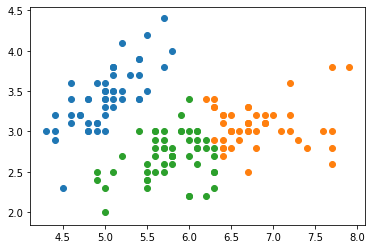

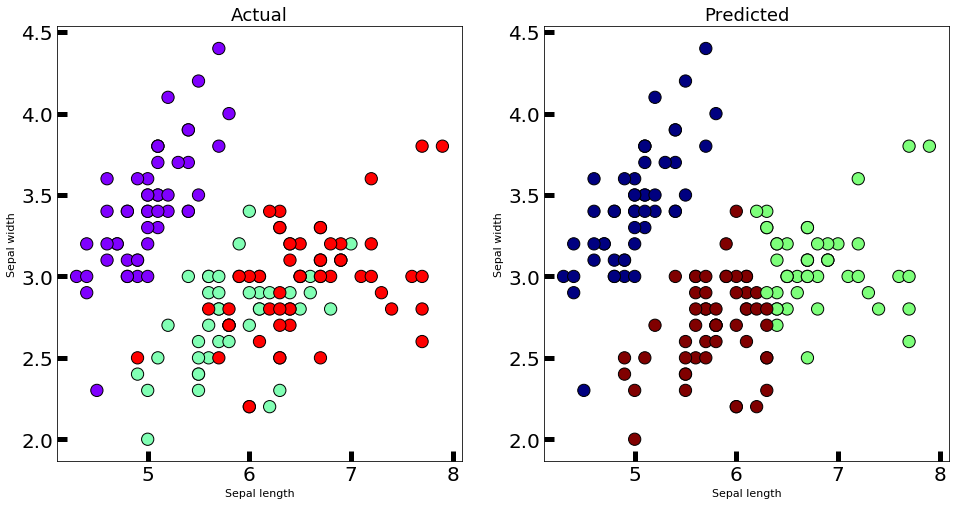

In [198]:
# k-means clustering with sklearn 
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
W = iris.data[:, :2]
e = iris.target
n_clusters=3
model = KMeans(n_clusters)
# fit the model
model.fit(W)
# assign a cluster to each example
yhat = model.predict(W)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(W[row_ix, 0], W[row_ix, 1])
# show the plot
#pyplot.show()

new_labels = model.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(W[:, 0], W[:, 1], c=e, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(W[:, 0], W[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=11)
axes[0].set_ylabel('Sepal width', fontsize=11)
axes[1].set_xlabel('Sepal length', fontsize=11)
axes[1].set_ylabel('Sepal width', fontsize=11)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

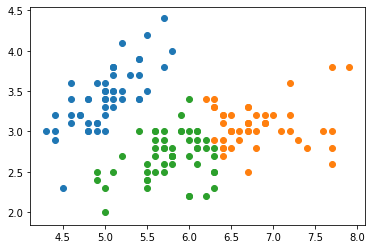

Text(0.5, 1.0, 'Actual')

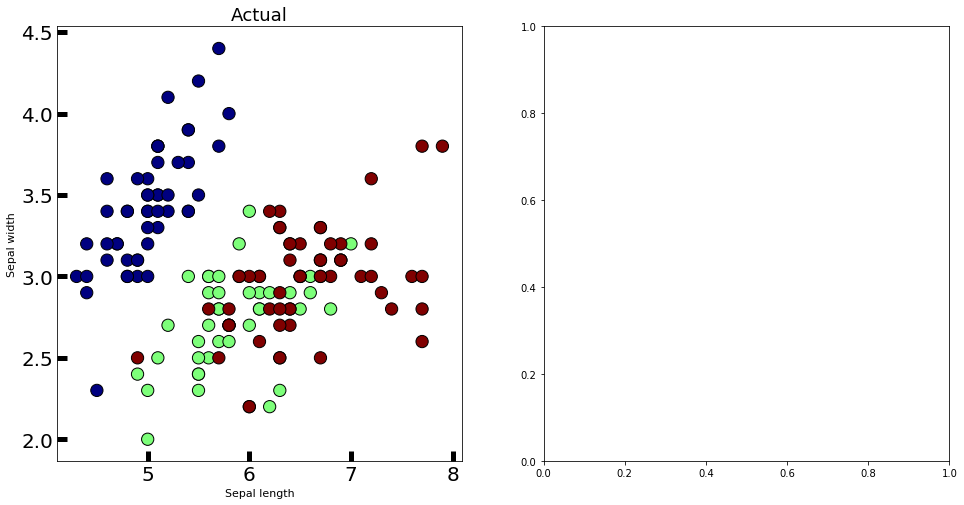

In [204]:
from sklearn.mixture import GaussianMixture
model1 = GaussianMixture(n_components=3)
# fit the model
model1.fit(W)
# assign a cluster to each example
what = model1.predict(W)
# retrieve unique clusters
wlusters = unique(what)
# create scatter plot for samples from each cluster
for cluster in wlusters:
    # get row indexes for samples with this cluster
    row_ix = where(what == cluster)
    # create scatter of these samples
    pyplot.scatter(W[row_ix, 0], W[row_ix, 1])
# show the plot
pyplot.show()
#new_labels2 = model1.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots( 1,2, figsize=(16,8))
axes[0].scatter(W[:, 0], W[:, 1], c=e, cmap='jet',edgecolor='k', s=150)
#axes[1].scatter(W[:, 0], W[:, 1], c=new_labels2, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=11)
axes[0].set_ylabel('Sepal width', fontsize=11)
#axes[1].set_xlabel('Sepal length', fontsize=11)
#axes[1].set_ylabel('Sepal width', fontsize=11)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
#axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
#axes[1].set_title('Predicted', fontsize=18)

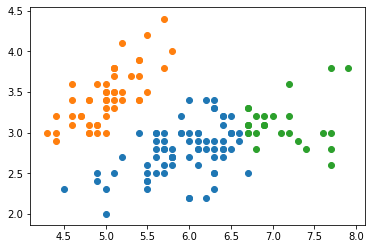

In [189]:
from sklearn.cluster import Birch

model2 = Birch(threshold=0.01, n_clusters=3)

model2.fit(W)

yqhat = model2.predict(W)

clusters1 = unique(yqhat)

for cluster in clusters1:

    row_ix = where(yqhat == cluster)
    # create scatter of these samples
    pyplot.scatter(W[row_ix, 0], W[row_ix, 1])
# show the plot
pyplot.show()

In [61]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(arr[0:2,:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
